In [34]:
import sys  
sys.path.insert(0, '../../')
import h5py
import matplotlib.pyplot as plt
from cloudseg.datasets.preprocessing import apply_clear_sky, process_irccam_img
import numpy as np
%matplotlib inline

In [3]:
file_name = '../../irccam_20180112_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    print(f['preds'])

<HDF5 dataset "preds": shape (10, 640, 640), type "<f4">


In [4]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['#refs#', 'AZ', 'BT', 'CLOUDS', 'CameraToffset', 'TB', 'TM', 'ZA', 'alphadata', 'calibdata', 'cloudfrac', 'img', 'mask', 'meteo', 'tair', 'thor']>


In [53]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(f['mask'].shape)

(640, 640)


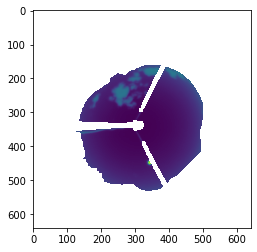

In [104]:
file_name = '../../data/raw/davos/irccam/irccam_20180525_rad.mat'
with h5py.File(file_name, 'r') as f:
    img = f['BT'][50]
    plt.imshow(img)

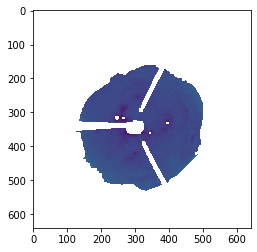

In [31]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    img = f['CLOUDS'][60]
    plt.imshow(img)

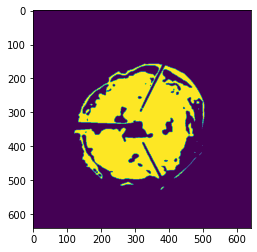

In [30]:
file_name = '../../irccam_20180112_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    img = f['preds'][60]
    plt.imshow(img)

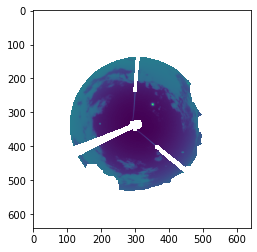

In [73]:
file_name = '../../data/raw/geneva/irccam/irccam_20200621_rad.mat'
idx = 800
with h5py.File(file_name, 'r') as f:
    img = f['BT'][idx]
    plt.imshow(img)

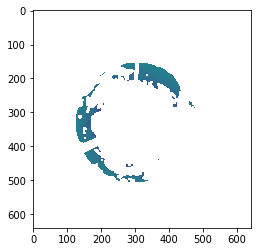

In [74]:
with h5py.File(file_name, 'r') as f:
    img = f['CLOUDS'][idx]
    plt.imshow(img)

In [75]:
file_name = '../../irccam_20200621_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    img = f['preds'][idx]
    plt.imshow(img)

IndexError: Index (800) out of range for (0-9)

In [84]:
example_file = '../../example_input.mat'
with h5py.File(example_file, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['#refs#', 'AZ', 'BT', 'CLOUDS', 'CameraToffset', 'TB', 'TM', 'ZA', 'alphadata', 'calibdata', 'cloudfrac', 'img', 'mask', 'meteo', 'tair', 'thor']>


In [105]:
import hdf5storage

example_file = '../../example_input_full.mat'
start = 10
limit = 20
with h5py.File(example_file, 'r') as f:
    output_data = {
        "BT": f["BT"][start:start+limit].T,
        "TB": f["TB"][start:start+limit].T,
        "TM": f["TM"][start:start+limit].T,
        "mask": np.array(f["mask"]).T
    }
    
output_file = "../../example_input.mat"
hdf5storage.savemat(output_file, output_data)

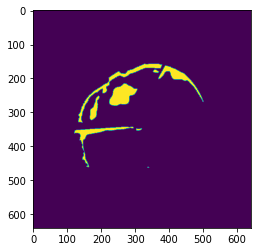

In [106]:
file_name = '../../example_input_pred.mat'
with h5py.File(file_name, 'r') as f:
    img = f['preds'][5]
    plt.imshow(img)